In [1]:
from data_query import get_index_price_klines, get_mark_price_klines,getsave_data_kline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
palette = sns.color_palette("husl")

In [2]:
# query data
index_price_df = getsave_data_kline(
    get_index_price_klines, 
    filename_prefix='BTCUSD_indexPrice', 
    pair='BTCUSD', 
    start_time='2022-02-10 00:00:00',
    end_time='2024-12-15 00:00:00',
    interval='1d'
)

mark_price_df = getsave_data_kline(
    get_mark_price_klines, 
    filename_prefix='BTCUSD_markPrice', 
    symbol='BTCUSDT_241227', 
    start_time='2022-02-10 00:00:00',
    end_time='2024-12-15 00:00:00',
    interval='1d'
)

Requesting URL: https://fapi.binance.com/fapi/v1/indexPriceKlines?pair=BTCUSD&interval=1d&startTime=1644422400000&endTime=1734192000000&limit=1000
==== Finished fetching Index Price data: BTCUSD ====
BTCUSD_indexPrice_2022-02-10_00-00-00_2024-12-15_00-00-00_1d.csv successfully downloaded, saving data...
Requesting URL: https://fapi.binance.com/fapi/v1/markPriceKlines?symbol=BTCUSDT_241227&interval=1d&startTime=1644422400000&endTime=1734192000000&limit=1000
==== Finished fetching Mark Price data: BTCUSDT_241227 ====
BTCUSD_markPrice_2022-02-10_00-00-00_2024-12-15_00-00-00_1d.csv successfully downloaded, saving data...


In [3]:
from datetime import datetime, timedelta

def minutes_until(date_str, date_format="%Y-%m-%d %H:%M:%S"):
    now = datetime.utcnow()

    try:
        target = datetime.strptime(date_str, date_format)
    except ValueError as e:
        raise ValueError(f"ValueError: The date_str must be in the format '{date_format}'.")

    if now >= target:
        raise ValueError(f"ValueErro: The target date must be in the future.")

    delta = target - now

    minutes = delta.total_seconds() / 60

    return int(minutes)

min_til_1227 = minutes_until("2024-12-27 00:00:00")
min_one_year = 60 * 24 * 365

In [4]:
# data cleaning
mark_price_df['close_time'] = pd.to_datetime(mark_price_df['close_time'], unit='ms')
index_price_df['close_time'] = pd.to_datetime(index_price_df['close_time'], unit='ms')

merged_df = pd.merge(mark_price_df[['close_time', 'close']], index_price_df[['close_time', 'close']], on='close_time', suffixes=('_mark', '_index'))
merged_df['manual_premium'] = (merged_df['close_mark'] / merged_df['close_index'] - 1) / (min_til_1227/min_one_year)

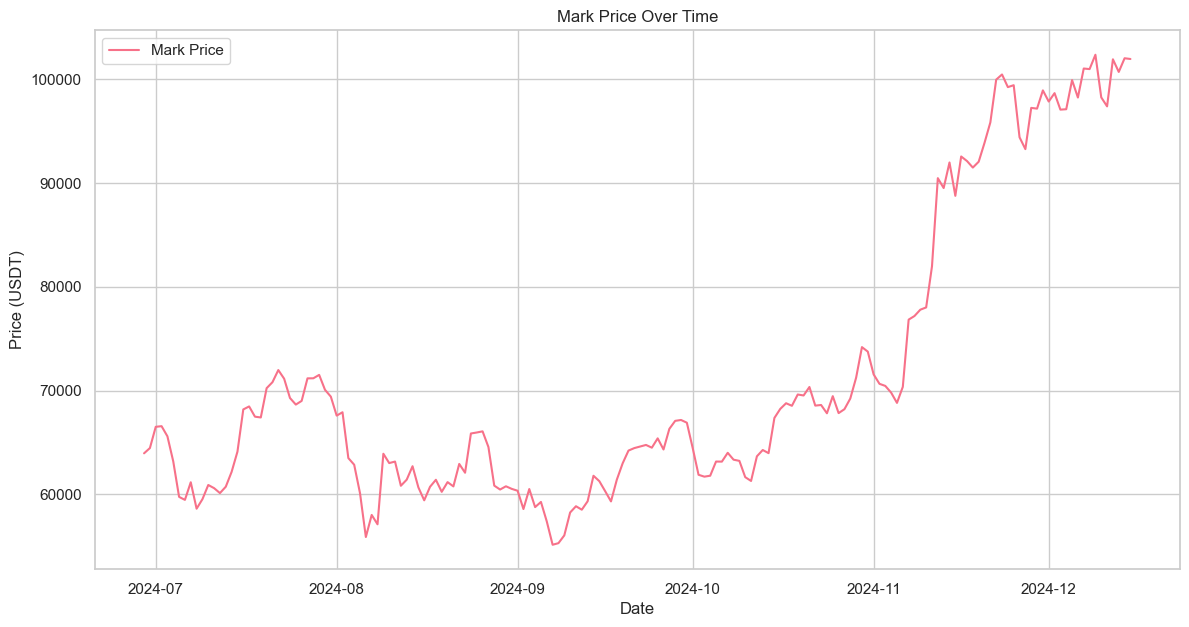

In [5]:
# mark price
plt.figure(figsize=(14, 7))
sns.lineplot(x=merged_df['close_time'], y=merged_df['close_mark'], color=palette[0], label='Mark Price')
plt.title('Mark Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()


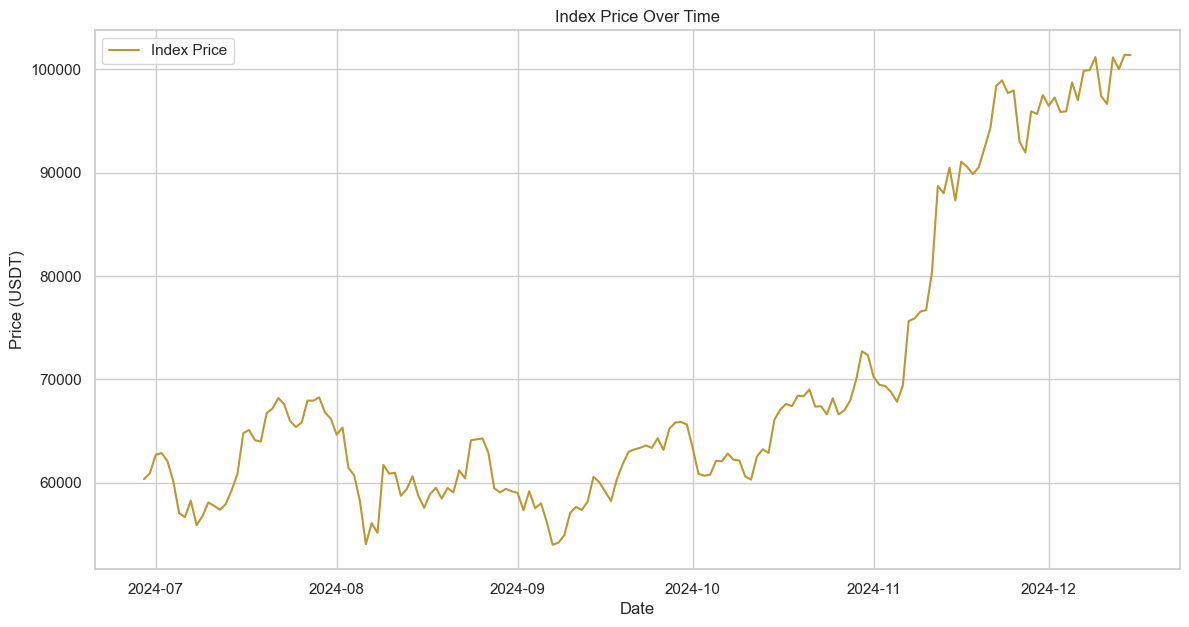

In [6]:
# index price
plt.figure(figsize=(14, 7))
sns.lineplot(x=merged_df['close_time'], y=merged_df['close_index'], color=palette[1], label='Index Price')
plt.title('Index Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()


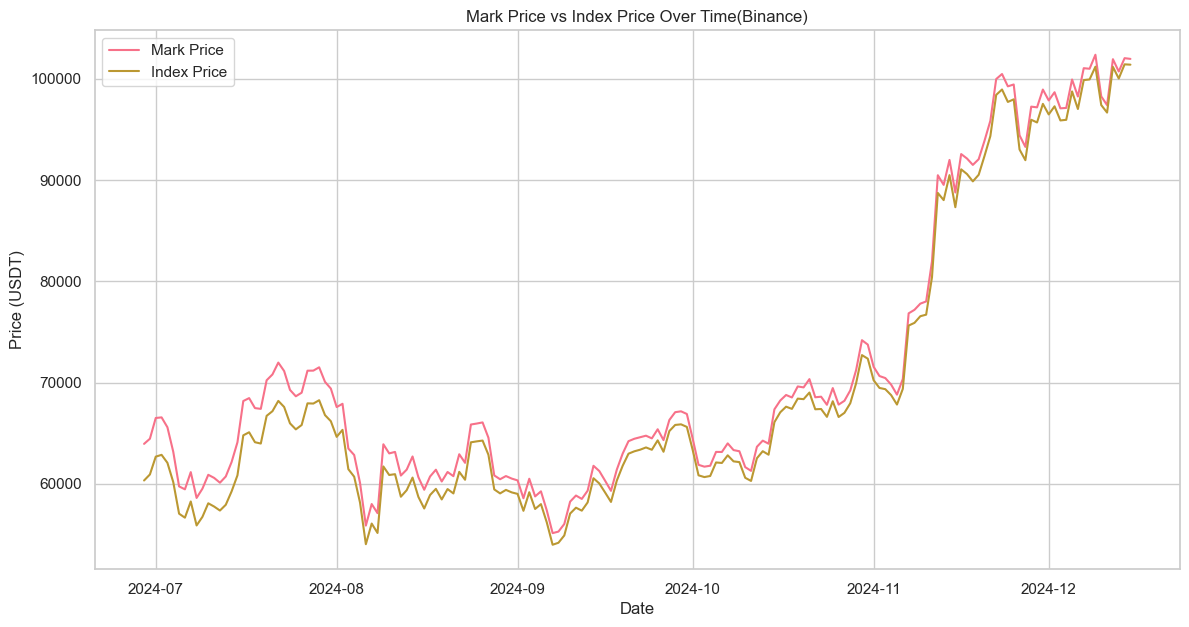

In [7]:
# mark price vs index price
plt.figure(figsize=(14, 7))
sns.lineplot(x=merged_df['close_time'], y=merged_df['close_mark'], color=palette[0], label='Mark Price')
sns.lineplot(x=merged_df['close_time'], y=merged_df['close_index'], color=palette[1], label='Index Price')
plt.title('Mark Price vs Index Price Over Time(Binance)')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()


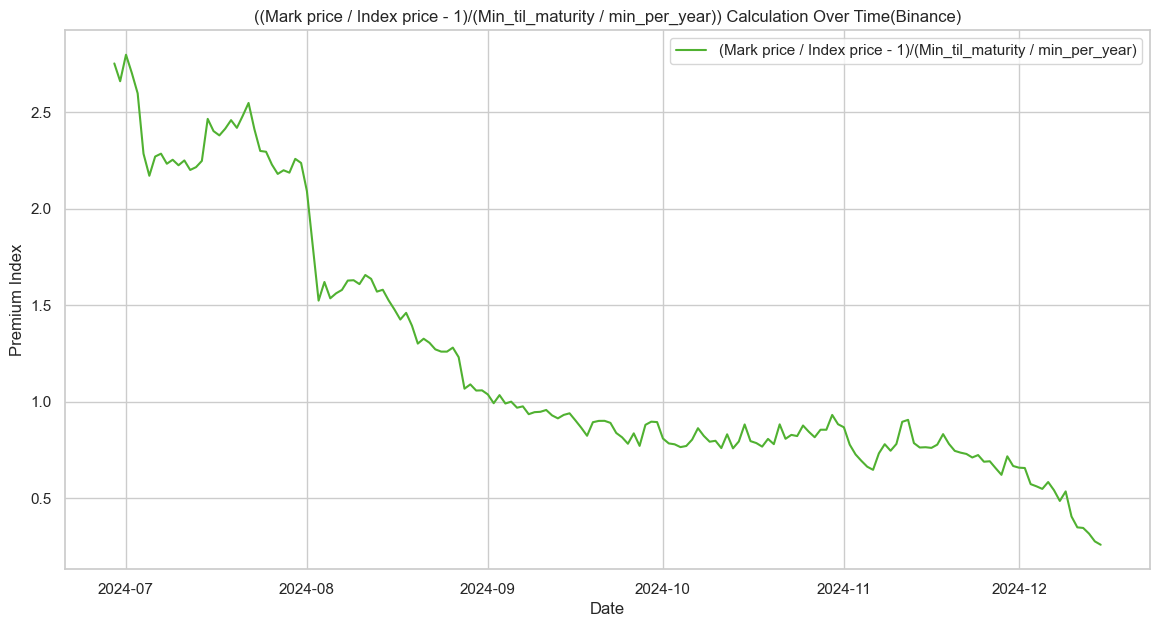

In [8]:
# premium
plt.figure(figsize=(14, 7))
sns.lineplot(x=merged_df['close_time'], y=merged_df['manual_premium'], color=palette[2], label='(Mark price / Index price - 1)/(Min_til_maturity / min_per_year)')
plt.title('((Mark price / Index price - 1)/(Min_til_maturity / min_per_year)) Calculation Over Time(Binance)')
plt.xlabel('Date')
plt.ylabel('Premium Index')
plt.legend()
plt.show()
